# Particle in one-dimensional potential well

## General remarks 

We consider the motion of a point particle in a one-dimensional potential well. Further, we assume that there are no dissipative forces and the energy is conserved.

Instead solving Newton eqaution we will use conservation of energy (which is an the integral of equation of motion)

\begin{equation}
\label{eq:cons_E1d}
\frac{m}{2}\left(\frac{dx}{dt}\right)^2+U(x)=E,
\end{equation}

First, if we treat velocity $v=\frac{dx}{dt}$ as independent variable we have a parametric equation of the orbit in **phase space**  $(x,v)$ of a point particle with  energy $E$:

$$\frac{m}{2}v^2+U(x)=E$$

Secondly we can solve this equation for time:

\begin{equation}
\label{eq:t_cons_E1d}
 t=\sqrt{\frac{m}{2}} \; \int_{-x1}^{x1}{\frac{dx}{(\sqrt{E-U(x)}}}
\end{equation}

This is a formula which allows to calculate period of oscillation and similar quantities.


In this section we will consider potentials in the form of 

\begin{equation}
\label{eq:Uxn}
U(x)=A |x|^n,
\end{equation}

where $n$ can be positive integer or a rational number.

Those functions  are bounded from below and have only one minimum. It is, therefore a family of potential wells in which frictionless point particle can oscillate. We will use computer algebra and numerical methods to investigate properties of motion is such potential wells.  


In [1]:
load('cas_utils.sage')

In [2]:
x = var('x')
m = var('m')
A = var('A')
assume(A > 0)
assume(m > 0)
y = function('y')(x)
de = m*diff(y,x,2) + 2*A*y == 0
showmath( desolve(de, y,ivar=x) )

<IPython.core.display.Math object>

## Particle in potential $|x|^2$

For $n=2$ we have a harmonic oscillator:

$$U(x)=A x^2.$$

In [3]:
#reset()
var('m A x E')
forget()
assume(A > 0)
assume(E > 0)
assume(E,'real')

To obtain the integration limits in the formula for the period of oscillation, we must solve the equation:

$$U(x)=E$$

So for the $Ax^2$ potential, we have:

In [4]:
U(A,x) = A*x^2
xextr = solve (U(A=A,x=x)==E,x)
showmath(xextr)

<IPython.core.display.Math object>

These formulas describe the values of the oscillator's extremes positions for a given energy. Let's put then in the formula for the period is oscillations \ref{eq:t_cons_E1d}:
:

In [5]:
period = 2*sqrt(m/2)*integrate( 1/sqrt(E-U(A,x)),(x,x.subs(xextr[0]),x.subs(xextr[1])))
period = period.canonicalize_radical()
showmath(period)

<IPython.core.display.Math object>

We see that the period does not depend on energy - means it does not depend on the initial condition. This is a known characteristic of the harmonic oscillator.

## Particle in the $|x|^n$ potential

If $n\neq2$, the general formula for the period can be written as:
$$T=4 \sqrt{\frac{m}{2}}\frac{1}{\sqrt{E}}\int_0^{x_1}\frac{dx}{\sqrt{1-A/E x^n}}$$
the integral can be brought to a dimensionless form  by substitution $$\frac{A}{E}x^n=y^n.$$

Is  is, in fact a  linear relationship between $x$ and $y$:

$$\left(\frac{A}{E}\right)^{\frac{1}{n}}x=y.$$

Therefore, we can change the variables on $y$ in the sub-expression. To do this, can transform with Sage the expression under integral in the following way:

In [6]:
var('dx dy A E x y')
var('n',domain='integer')
assume(n>=0)
assume(A>0)
assume(E>0)
ex1 = dx/sqrt(1-A/E*x^n)
showmath(ex1)

<IPython.core.display.Math object>

and we substitute:

In [7]:
ex2 = ex1.subs({x:(E/A)^(1/n)*y,dx:dy*(E/A)^(1/n)})
showmath( ex2.canonicalize_radical().full_simplify() )

<IPython.core.display.Math object>

Let's take out the expression that depends on the parameters $A$ and $E$:

In [8]:
expr2 = (ex2/dy*sqrt(-y^n + 1)).full_simplify()
showmath( expr2.canonicalize_radical() )

<IPython.core.display.Math object>

In [9]:
prefactor = expr2*sqrt(m/2)*4*1/sqrt(E)
showmath( prefactor.canonicalize_radical() )

<IPython.core.display.Math object>

that is, we obtained:

$$T=4 \sqrt{\frac{m}{2}}\frac{1}{A^{1/n}} E^{\frac{1}{n}-\frac{1}{2}}\int_0^{1}\frac{dy}{\sqrt{1- y^n}}$$


For $n=2$, dependence on $E$ disappears, as we already have seen in previous case.

We still need to calculate the integration limit of the $y$ variable. In the integral, the upper limit is the position in which all energy is potential energy:

$$U(x)=E,$$

in our case $$Ax^n=E.$$

By changing the variables we get:

In [10]:
solve( (A*x^n == E).subs({x:(E/A)^(1/n)*y}), y)

[y == 1]

that is, the integration limit is $y\in(0,1).$

The scaled integral can be expressed by the beta function of Euler http://en.wikipedia.org/wiki/Beta_function.
We can calculate it:

In [11]:
var('a')
assume(a,'integer')
assume(a>0)
showmath( assumptions() )

<IPython.core.display.Math object>

In [12]:
integrate(1/sqrt(1-x^(a)),(x,0,1) )

beta(1/2, 1/a)/a

We get a formula containing the beta function. It can be evaluated numerically for any values ​​of the $a$ parameter.

In [13]:
(beta(1/2,1/a)/a).subs({a:2}).n()

1.57079632679490

Let's examine this formula numerically. You can use the $\beta$ function, or numerically estimate the integral. This second approach allows you to explore any potential, not just $U(x)=ax^n$.

In [14]:
def beta2(a,b):
    return gamma(a)*gamma(b)/gamma(a+b)

a_list = srange(0.02,5,0.1)
a_list2 = [1/4,1/3,1/2,1,2,3,4,5]

integr_list = [ integral_numerical( 1/sqrt(1-x^a_) ,0,1, algorithm='qng',rule=2)[0] \
               for a_ in a_list ]
integr_list_analytical = [ beta2(1/2, 1/a_)/a_ for a_ in a_list2 ]

we obtain some analytically simple formulas:

In [15]:
showmath( integr_list_analytical )

<IPython.core.display.Math object>

Not  we can compare those analytical numbers with numerical results, for example on the plot:

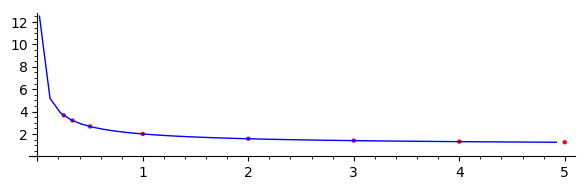

In [16]:
plt_num = list_plot(zip( a_list,integr_list), plotjoined=True )
plt_anal = list_plot(zip( a_list2,integr_list_analytical),color='red')
(plt_num + plt_anal).show(ymin=0,figsize=(6,2))

Having an analytical solution, you can examine the asymptotics for large $n$:

In [17]:
var('x')
asympt = limit( beta2(1/2, 1/x)/x,x=oo )
asympt

1

In [18]:
plt_asympt = plot(asympt,(x,0,5),linestyle='dashed',color='gray')

Let's add a few points for which the integral takes exact values

In [19]:
l = zip(a_list2[:5],integr_list_analytical[:5])
showmath(l)

<IPython.core.display.Math object>

In [20]:
def plot_point_labels(l):
    p=[]
    for x,y in l:
        p.append(  text( "$("+latex(x)+", "+latex(y)+")$" ,(x+0.1,y+0.2) , fontsize=14,horizontal_alignment='left',color='gray') )
        p.append( point ( (x,y),size=75,color='red' ) )
    return sum(p)

In [21]:
some_points = plot_point_labels(l)

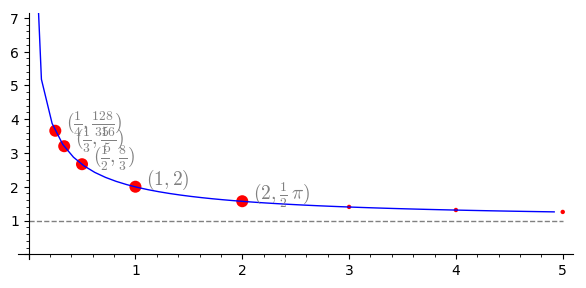

In [22]:
plt_all = plt_num+plt_anal+plt_asympt+some_points
plt_all.show(figsize=(6,3),ymin=0,ymax=7)

## Numerical convergence

The integral  
$$\int_0^1  \frac{dx}{\sqrt{1-x^n}}$$ seems to be divergent for $n:$

In [23]:
showmath( numerical_integral( 1/sqrt(1-x^(0.25)) , 0, 1)  )

<IPython.core.display.Math object>

However, choosing the right algorithm gives the correct result:

In [24]:
a_ = 1/4. # exponent in integral
integral_numerical( 1/sqrt(1-abs(x)^a_) , 0, 1, algorithm='qags')

(3.6571428571462925, 1.611218136687853e-08)

lets check it out with an exact formula:

In [25]:
(beta(1/2,1/a)/a).subs({a:a_}).n()

3.65714285714286

indeed, we  see that carefull numerical integration give finite result.

## The dependence of the period on particle energy for different $n$.

In [26]:
var('E x n')
def draw_E(n,figsize=(6,2.5)): 
    p = []
    p2 = []
    p.append( plot(abs(x)^n,(x,-2,2),\
                   ymin=0,ymax=4,legend_label=r"$U(x)=|x|^{%s}$" % n )   )
    p.append( plot( (x)^2,(x,-2,2),\
                   color='gray',legend_label=r"$U(x)=x^{2}$",\
                   axes_labels=[r"$x$",r"$U(x)$"]  ))
    
    p2.append(  plot(  4/sqrt(2)*(beta(1/2, 1/n)/n)* E^(1/n-1/2),\
                     (E,0.00,3),ymin=0,ymax=7,axes_labels=[r"$E$",r"$T$"]  ) )
    p2.append(  plot(  4/sqrt(2)*(beta(1/2, 1/2)/2),\
                     (E,0.00,3) ,color='gray' ) )
    
    show( sum(p), figsize=figsize )
    show( sum(p2), figsize=figsize )
    

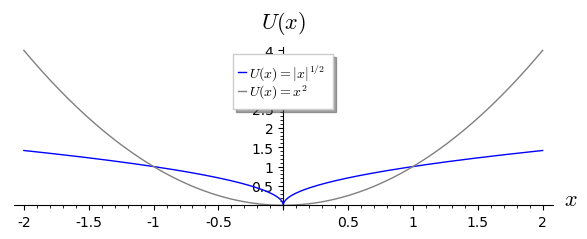

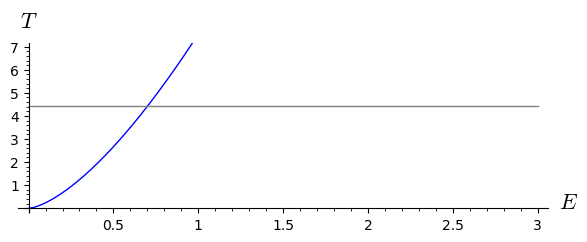

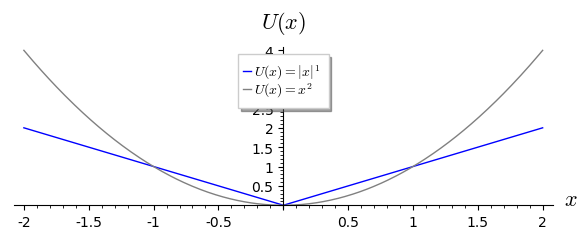

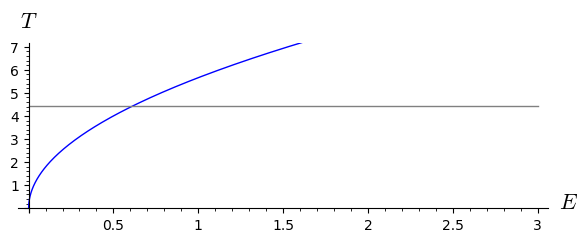

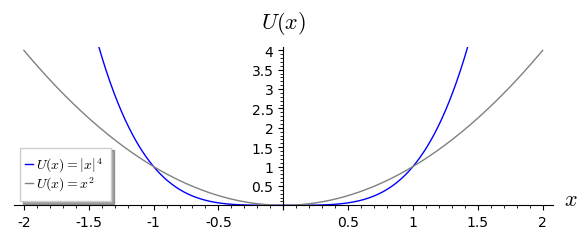

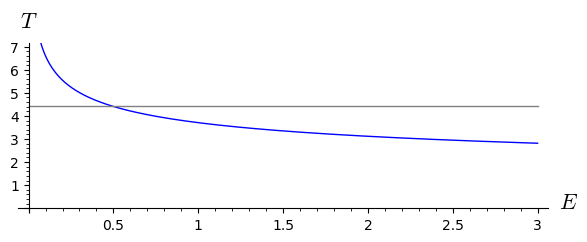

In [27]:
draw_E(1/2)
draw_E(1)
draw_E(4)

We can plot the dependende of period on energry (i.e. amplitude) $T(E)$ for different values of $n$. In figure belowe we see that if $n>2$ then oscillations are faster as energy grow. On the other hand if $n<1$, oscillations are getting slower with griwing energy.

Another interesting observation of that in potentials with $n>1$ and $n<1$ oscillations will become infinitely slow and fast, respectively, if $E\to0$. For $n>1$ potential well is *shallow* at the bottom and *steep* far away from the equilibrium point  and for $n<1$ the opposite is true.

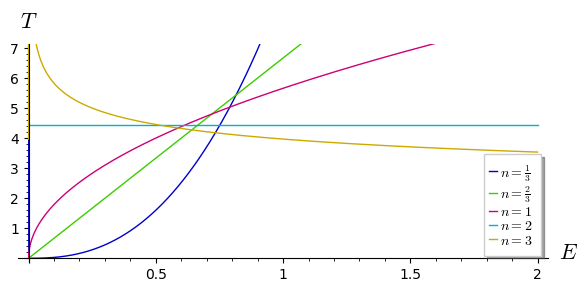

In [28]:
n_s  = [1/3,2/3, 1, 2, 3] 
plot( [4/sqrt(2)*(beta(1/2, 1/n_)/n_)* E^(1/n_-1/2) \
                 for n_ in  n_s],\
    (E,0.00,2),axes_labels=[r"$E$",r"$T$"],\
     legend_label=['$n='+str(latex(n_))+'$' for n_ in n_s],\
     ymax=7, figsize=(6,3) )
            

## Numerical integration of equations of motion 

Here we will investigate numerically period of motion $T$  and compare with analytical formula.
First, let's have a closer look how potential and force behave for different exponents $n$:


In [29]:
# @interact
def plot_Uf(n_):
    U(x) = abs(x)^(n_)
    plt = plot( [U(x),-diff( U(x),x)],(x,-1,1),\
               detect_poles='show',ymin=-3,ymax=3,
              legend_label=[r"$U(x)$",'$f(x)$'])
    plt.axes_labels([r"$x$",r"$U(x)=|x|^%s$"%latex(n_)])
    show(plt,figsize=(6,3))

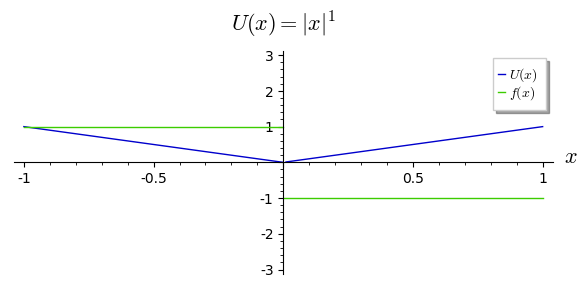

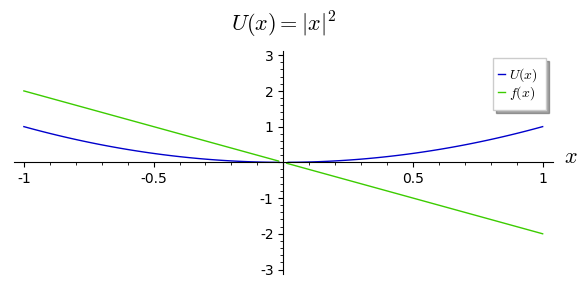

(None, None)

In [30]:
plot_Uf(1),plot_Uf(2)

We can see that for $n>=1$ force and potential is continous. If $n=1$ then force has finite jump (discontinuity). Both those cases should not be a problem for numerical integration. However for $n<1$ we have infinite force at $x=0$:

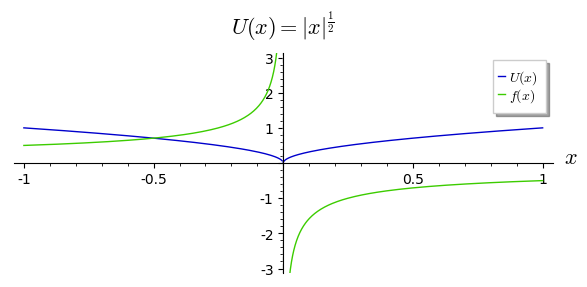

In [31]:
plot_Uf(1/2)

There is a possibility that  if the ODE integrator comes too close, it will blow out!

We can fix this problem by softening the  potential singularity by adding small number: 
$$ |x| \to |x| + \epsilon. $$

In [33]:
var('x',domain='real')
var('v t')
eps = 1e-6
U(x) = (abs(x)+eps)^(1/2)
showmath( U.diff(x).expand().simplify() )

<IPython.core.display.Math object>

to make sure that Sage will not leave $x/|x|$ unsimplified we can do:

In [34]:
w0 = SR.wild(0)
w1 = SR.wild(1)
f = -U.diff(x).subs({w0*w1/abs(w1):w0*sign(w1)})

In [35]:
showmath( f(x) )

<IPython.core.display.Math object>

In [36]:
ode_pot = [v,f(x)]

t_lst = srange(0,10,0.01)
sol = desolve_odeint(ode_pot,[1,.0],t_lst,[x,v])

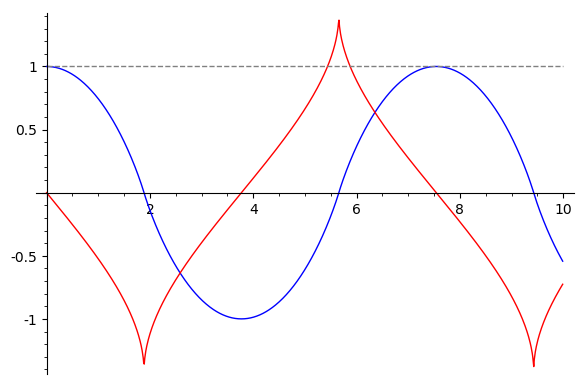

In [37]:
p = line(zip(t_lst, sol[:,0])) + line(zip(t_lst, sol[:,1]), color='red')
p.axes_labels(['$t$','$x(t),v(t)$'])
p + plot(1,(x,0,10),linestyle='dashed',color='gray')

We can from the trajectory computer numerically the period. For this purpose one might need an interpolation of numerical table returned by `desolve_odeint`:

In [38]:
import numpy as np
def find_period(x,t):
    zero_list=[]
    x0 = x[0]
    for i in range(1,len(x)):
        if x[i]*x[i-1] < 0:
            zero_list.append( - (t[i-1]*x[i] - t[i]*x[i-1])/(x[i-1] - x[i]) )
    lnp = np.array(zero_list)
    return 2*(  (lnp-np.roll(lnp,1))[1:] ).mean()

In [40]:
var('x1 x2 t1 t2 a b ')
showmath(  (-b/a).subs(  solve([a*t1+b==x1,a*t2+b==x2],[a,b], solution_dict=True)[0] ) )

<IPython.core.display.Math object>

We find numerically a period of trajectory:

In [41]:
find_period( sol[:,0],t_lst)

7.54250742200179

Exact results  for comparison:

In [42]:
# for n=2 2*pi/sqrt(2)==(2*pi/sqrt(2)).n()
table( [["n","T"]]+[ [n_,((4/sqrt(2)*(beta(1/2, 1/n_)/n_)* E^(1/n_-1/2)).subs({E:1})).n()] 
                    for n_ in [1/4,1/3,1/2,2/3,1,2,3,4,5] ] )


n,T
,
,
,
,
,
,
,
,
,


## Using the formula for the period to reproduce the trajectory of movement

We take $m=1$ and $A=1$ (then $x=E$), then we can reproduce the trajectory reversing the formula for $T(E)$. 

In [45]:
var('x')
U(A,x) = A*x^2
A = 1/2
E = 1
m = 1.
x1=0.1
showmath( solve(E-U(A,x), x) )

<IPython.core.display.Math object>

In [46]:
t_lst  = [ (sqrt(m/2.)*integrate( 1/sqrt(E-U(A,x)),(x,0,x1)).n(),x1)  \
          for x1 in srange(0,sqrt(2.)+1e-10,1e-2)]

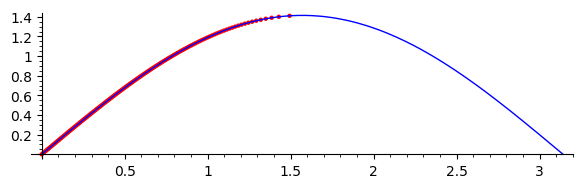

In [47]:
point(t_lst ,color='red')+\
 plot(sqrt(2)*sin(x),(x,0,pi),figsize=(6,2))

Interestingly, we if we known the dependence of $T(E)$ then we can calculate exactly the potential! 


\newpage